# Importing libraries


In [49]:
import pandas as pd
import numpy as np
import re  #importing regular expression package
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
from nltk import TweetTokenizer
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prash_5kr5m37\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Matplotlib is building the font cache; this may take a moment.


# Loading dataset

In [2]:
data=pd.read_csv(r"data\product_sentiment\train.csv")

In [3]:
data


,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2
...,...,...,...,...
6359,2945,Thanks @mention for hosting this event #sxsw #...,9,2
6360,4528,"SXSW iPhone app is awesome, but iPad app crash...",7,1
6361,6526,RT @mention RT @mention Download 20+ free trac...,9,2
6362,2110,OH at Texas Social Media Awards: 'You don't ne...,9,2


# Preprocessing

In [4]:
data.groupby('Product_Type').count() #Product_Type - Different types of product (9 unique products)

,Text_ID,Product_Description,Sentiment
Product_Type,,,
0,52,52,52
1,59,59,59
2,465,465,465
3,300,300,300
4,19,19,19
5,213,213,213
6,665,665,665
7,327,327,327
8,194,194,194


In [5]:
data=data.drop(['Text_ID', 'Product_Type'], axis = 1) #dropping mulitple columns for sentimental analysis

In [6]:
data['Sentiment'].unique() #unique values in dependant variable

array([2, 1, 3, 0], dtype=int64)

In [7]:
data.isna().sum() #checking for null values

Product_Description    0
Sentiment              0
dtype: int64

In [8]:
data.groupby('Sentiment').count() #0 - Cannot Say ,1 - Negative ,2 - Positive, 3 - No Sentiment

,Product_Description
Sentiment,
0,111
1,399
2,3765
3,2089


# Cleaning the texts

In [9]:
corpus = []
for i in range(0,len(data)):                                #len(data) indicates no. of rows or lines to process
  review = re.sub('[^a-zA-Z]', ' ', data['Product_Description'][i])#replace any value other than a-z or A-Z with space
  review = review.lower()                                   #lowercase all words in a row
  tk = TweetTokenizer()                                     #creating object for tokenizer
  review =tk.tokenize(review)                           
  stemmer = SnowballStemmer('english')                      #creating object for stemmer
  all_stopwords = stopwords.words('english')                #importing english stopwords
  all_stopwords.remove('not')                               #removing 'not' from stopwords as it has sentimental value
  review = [stemmer.stem(word) for word in review if not word in set(all_stopwords)] #stemming if word not present in stop words
  review = ' '.join(review)                                 #joining list of words to form a sentence
  corpus.append(review)                                     #adding string to list

In [10]:
corpus

['web design guid io android app today mention link sxsw',
 'rt mention line ipad longer today yesterday sxsw get line today fun',
 'crazi appl open temporari store austin tomorrow handl rabid sxsw eye pad seeker',
 'lesson googl one pass digit environ user want purchas across everi platform one tool sxsw elonsxsw',
 'rt mention panel quot mom ipad design boomer quot sxsw',
 'rt mention think ef hubbi line ipad someon point toward line wife number sxswi sxsw',
 'quot android user not iphon user use option menu contextu menu quot mention sxsw',
 'wow rt mention interrupt regular schedul sxsw geek program big news link googl circl',
 'googl launch new social network call circl possibl today link link sxsw',
 'mention welcom enjoy sxsw ride anywher austin dwnld groundlink app link booth',
 'rt mention appl plan keep austin wire open pop appl store sxsw link',
 'yeay rt mention new ubersoci iphon app store includ uberguid sxsw sponsor masha link',
 'know sxsw season app updat whenev open i

# TFIDF Vectorization

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=5700) #creating object of TFIDF Vectorizer
X = vec.fit_transform(corpus)     #Vectorizing the tweets using TFIDFVectorizer

In [12]:
X

<6364x5700 sparse matrix of type '<class 'numpy.float64'>'
	with 72117 stored elements in Compressed Sparse Row format>

In [13]:
#Seperating label y from the train_data
y = data.Sentiment
y = y.values
y

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

# Splitting train and test dataset

In [14]:
#Splitting the train data into X_train, y_train (train_set), X_test, y_test (test_set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state=42)

In [15]:
X_train=X_train.toarray() # A sparse matrix cannot be passed to train. Use X.toarray() to convert to a dense numpy array.

In [16]:
#Oversampling the train_set to overcome imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

# GaussianNB

In [17]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_res, y_res)

GaussianNB()

In [18]:
X_test= X_test.toarray()


In [21]:
y_pred = model1.predict(X_test)

In [51]:
m1=f1_score(y_test, y_pred,average='micro')
m1

0.6135113904163394

# Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression 
mode2 = LogisticRegression()
mode2.fit(X_res, y_res)
y_pred2 = mode2.predict(X_test)

In [52]:
m2=f1_score(y_test, y_pred2,average='micro')
m2

0.6135113904163394

# Random Forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_res, y_res)
y_pred3 = model3.predict(X_test)

In [53]:
m3=f1_score(y_test, y_pred3,average='micro')
m3

0.6457187745483111

# XGB classifier

In [38]:
from xgboost import XGBClassifier 
model4 = XGBClassifier()
model4.fit(X_res, y_res)
y_pred4 = model4.predict(X_test)

In [54]:
m4=f1_score(y_test, y_pred4,average='micro')
m4

0.6410054988216811

# Support Vector Machine

In [40]:
from sklearn.svm import SVC  
model5= SVC()
model5.fit(X_res,y_res)
y_pred5 = model5.predict(X_test)

In [55]:
m5=f1_score(y_test, y_pred5,average='micro')
m5

0.6692851531814611

# KNN classification

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier(n_neighbors=5)
model6.fit(X_train,y_train)
y_pred6=model6.predict(X_test)

In [57]:
m6=f1_score(y_test, y_pred6,average='micro')
m6

0.6158680282796544

# Comparing algorithm F1 score

In [58]:
algo=['Naive bayes','LR','Random_forest','XG_boost','SVR','KNN']

values=[m1,m2,m3,m4,m5,m6]


In [59]:
ypos=np.arange(len(algo))
ypos

array([0, 1, 2, 3, 4, 5])

<BarContainer object of 6 artists>

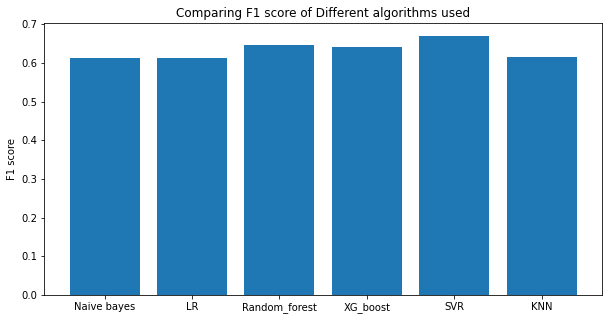

In [63]:
plt.xticks(ypos,algo)
plt.ylabel('F1 score')
plt.title('Comparing F1 score of Different algorithms used')

plt.rcParams["figure.figsize"] = (8,5)
plt.bar(ypos,values)



# Hyper-Parameter Tuning -SVR

In [64]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.001,0.1,10], 'gamma':[0.1,0.01,'auto'],'kernel':['rbf','linear']}

#C - Regularization - squared l2 error is calculated
#gamma - Fit of the model
#kernal - kernal to be used 

In [ ]:
grid=GridSearchCV(model5, parameters) 
grid.fit(X_train, y_train)

In [ ]:
ypred=model5.predict(X_test)

In [ ]:
f1_score(y_test, y_pred,average='micro')

In [ ]:
#confusison matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

In [ ]:
#END